# Import Library

In [64]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import imutils

# Read the image file

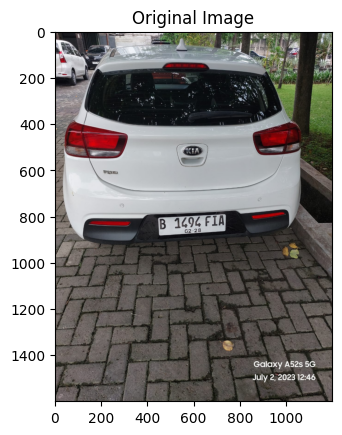

In [101]:
image = cv2.imread('images/asset.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

# Image Processing and Edge detection performing

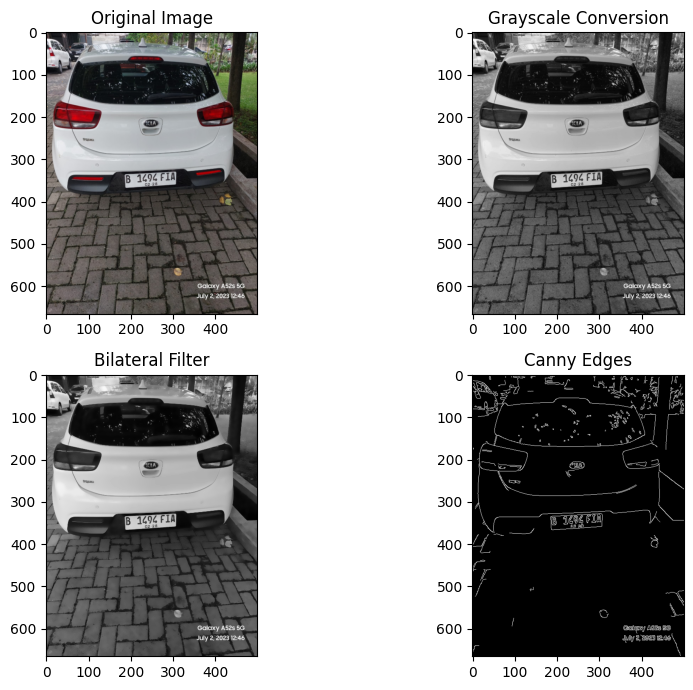

In [102]:
image = imutils.resize(image, width=500)
img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
fig, ax = plt.subplots(2, 2, figsize=(10,7))
ax[0,0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image')

# RGB to Gray scale conversion
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ax[0,1].imshow(gray, cmap='gray')
ax[0,1].set_title('Grayscale Conversion')

# Noise removal with iterative bilateral filter(removes noise while preserving edges)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
ax[1,0].imshow(gray, cmap='gray')
ax[1,0].set_title('Bilateral Filter')

# Find Edges of the grayscale image
edged = cv2.Canny(gray, 200, 400)
ax[1,1].imshow(edged, cmap='gray')
ax[1,1].set_title('Canny Edges')

fig.tight_layout()
plt.show()

# Find contours based on Edges
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30] #sort contours based on their area keeping minimum required area as '30' (anything smaller than this will not be considered)
NumberPlateCnt = None 

# loop over our contours to find the best possible approximate contour of number plate
count = 0
for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:  # Select the contour with 4 corners
            NumberPlateCnt = approx #This is our approx Number Plate Contour
            x,y,w,h = cv2.boundingRect(c)
            ROI = img[y:y+h, x:x+w]
            break

if NumberPlateCnt is not None:
    # Drawing the selected contour on the original image
    cv2.drawContours(image, [NumberPlateCnt], -1, (0,150,0), 3)

# Deteksi plat nomor kendaraan

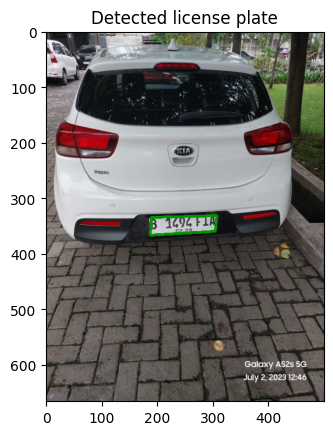

In [103]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected license plate")
plt.show()

# Hasil crop setelah deteksi plat nomor

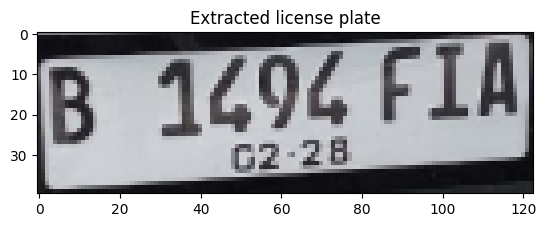

In [104]:
# Find bounding box and extract ROI
plt.imshow(ROI)
plt.title("Extracted license plate")
plt.show()

# Hasil gambar binary dan edges dari hasil crop

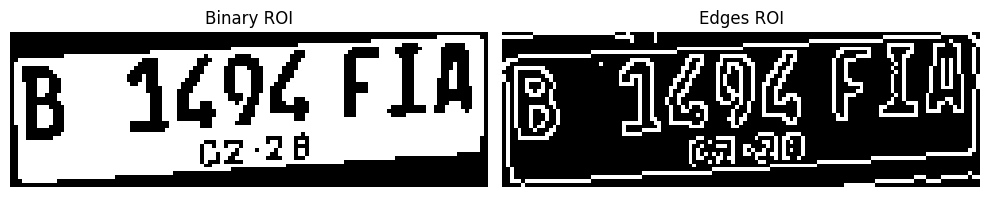

In [105]:
# Convert ROI to grayscale
gray_roi = cv2.cvtColor(ROI, cv2.COLOR_BGR2GRAY)

# Convert ROI to binary image
_, binary_roi = cv2.threshold(gray_roi, 130, 255, cv2.THRESH_BINARY)

# Find edges of the ROI
edges_roi = cv2.Canny(gray_roi, 30, 50)

# Display the binary and edges images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(binary_roi, cmap='gray')
ax[0].set_title('Binary ROI')
ax[0].axis('off')

ax[1].imshow(edges_roi, cmap='gray')
ax[1].set_title('Edges ROI')
ax[1].axis('off')
plt.tight_layout()
plt.show()